<a href="https://colab.research.google.com/github/layadevulapalli/neural_networks_from_scratch/blob/main/Laya_Devulapalli_%7C_Project_Building_Neural_Networks_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

project #4!!!

this is my numpy code:

In [11]:
# imports
import torch
import torch.nn as nn
import torchvision
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
#i was told to move this here because there was a name error
from torchvision.transforms import ToTensor

# need to downlaod the training datasets
training_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=ToTensor(),
)

# need to download the test data!
test_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=ToTensor(),
)

# now we are defining batch size and stuff
batch_size = 64

# creating data loaders
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)
#this is where the weird name error stuff ends

# i'm downloading my data
raw_train  = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
raw_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

# making the data as numpy arrays?
X_train_numpy = raw_train.data
y_train_numpy = np.array(raw_train.targets)

X_test_numpy = raw_test.data
y_test_numpy = np.array(raw_test.targets)

# normalize by divising by 255
X_train_float = X_train_numpy.astype('float32') / 255.0
X_test_float = X_test_numpy.astype('float32') / 255.0


# now we're converting to tensors
X_train_tensor = torch.tensor(X_train_float).permute(0, 3, 1, 2)
y_train_tensor = torch.tensor(y_train_numpy, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_float).permute(0, 3, 1, 2)
y_test_tensor = torch.tensor(y_test_numpy, dtype=torch.long)

# dataloaders?
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"data ready, image shape: {X_train_tensor.shape}")

data ready, image shape: torch.Size([50000, 3, 32, 32])


now we know that the images are 32x32, but we want them to be 224z224 so that it can be read --> so we build a CNN to resize it?? we use ResNet18 to recognize the classes? -- *resnet has a forward function written already-- but write one w forward function + baby CNN*


*we don't use CNN as that will get low accuracy, and rather use a pre-trained resnet18 as it will get higher accuracy --- **ask if i should change this to a baby cnn??**

In [12]:
from torchvision import models
import torch.nn as nn

#loading in ResNet18 model
model = models.resnet18(pretrained=True)

#resnet looks for 100 things, we only have 10 cateogries so need to change that:
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)

#now we're sending that to gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

now we are #trainingthismodel? using training loop and testing loop

In [13]:
def training_loop(dataloader, model, loss_function, optimizer, device):
  model.train()
  total_loss = 0

  #using class practice as model
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    #forward pass?
    logits = model(X)
    loss = loss_function(logits, y)

    #backwards pass?
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
  return total_loss / len(dataloader)

def testing_loop(dataloader, model, loss_function, device):
  model.eval()
  correct = 0
  total = 0
  total_loss = 0

  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      logits = model(X)
      pred = logits.argmax(1)
      loss = loss_function(logits, y)
      total_loss += loss.item()
      correct += (pred == y).sum().item()
      total += y.size(0)

    accuracy = 100 * correct / total
    return 100 * correct / total, total_loss / len(dataloader)

#actual execution??
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# me keeping track of progress
train_loss_history = []
test_acc_history = []

print("Starting trainign...")
for epoch in range(10):
  train_loss = training_loop(train_dataloader, model, loss_fn, optimizer, device)
  test_acc, test_loss = testing_loop(test_loader, model, loss_fn, device)

  #saving the results
  train_loss_history.append(train_loss)
  test_acc_history.append(test_acc)

  print(f"Epoch {epoch+1} | Train loss: {train_loss:.4f} | Test Acc: {test_acc:.2f}")

print("finished!")


Starting trainign...
Epoch 1 | Train loss: 2.1827 | Test Acc: 27.15
Epoch 2 | Train loss: 1.5261 | Test Acc: 15.33
Epoch 3 | Train loss: 1.4190 | Test Acc: 42.93
Epoch 4 | Train loss: 1.1726 | Test Acc: 48.94
Epoch 5 | Train loss: 1.0182 | Test Acc: 62.79
Epoch 6 | Train loss: 0.9058 | Test Acc: 63.94
Epoch 7 | Train loss: 0.8092 | Test Acc: 65.10
Epoch 8 | Train loss: 0.7266 | Test Acc: 60.64
Epoch 9 | Train loss: 0.6437 | Test Acc: 58.15
Epoch 10 | Train loss: 0.5776 | Test Acc: 61.88
finished!


now this is visualization!!

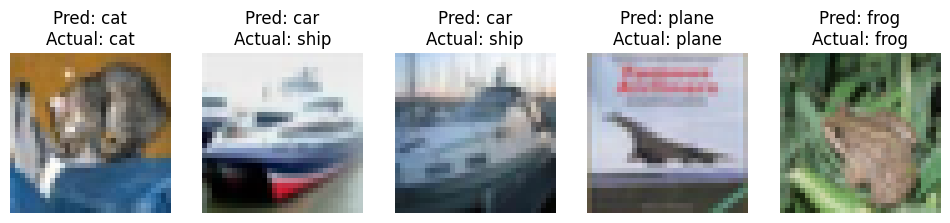

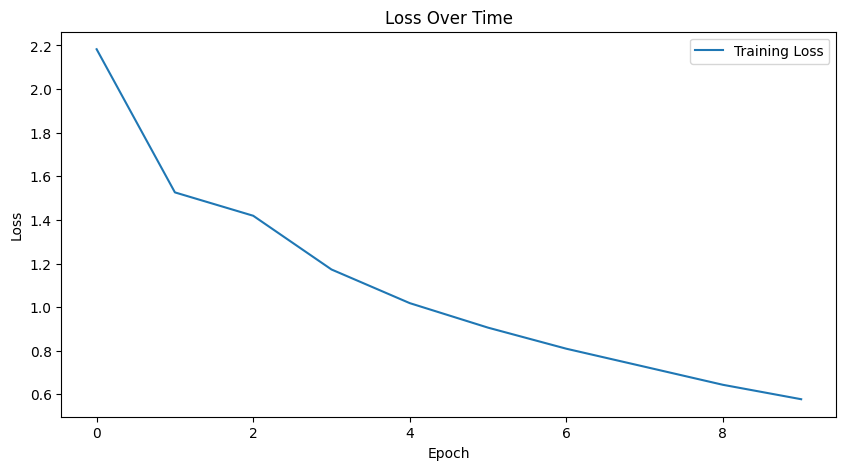

In [14]:
import matplotlib.pyplot as plt

#batch of images from test set
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

# predictions?
outputs = model(images)
_, preds = torch.max(outputs, 1)
# first 5 images
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 4))
for i in range(5):
  plt.subplot(1, 5, i+1)
  #undo earlier transpose for the image to not look funky
  img = images[i].cpu().permute(1, 2, 0).numpy()
  plt.imshow(img)
  plt.title(f"Pred: {classes[preds[i]]}\nActual: {classes[labels[i]]}")
  plt.axis('off')
plt.show()


#now we are plotting the training curve?
plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Training Loss')
plt.title('Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Now I am making the pytorch challenger

Shape of X [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y: torch.Size([64]) torch.int64
Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Starting trainign...
Epoch  1 | loss: 1.8498 | Acc: 38.76%
Epoch  2 | loss: 1.6644 | Acc: 44.23%
Epoch  3 | loss: 1.5695 | Acc: 46.32%
Epoch  4 | loss: 1.5090 | Acc: 47.26%
Epoch  5 | loss: 1.4628 | Acc: 47.68%
Epoch  6 | loss: 1.4242 | Acc: 49.16%

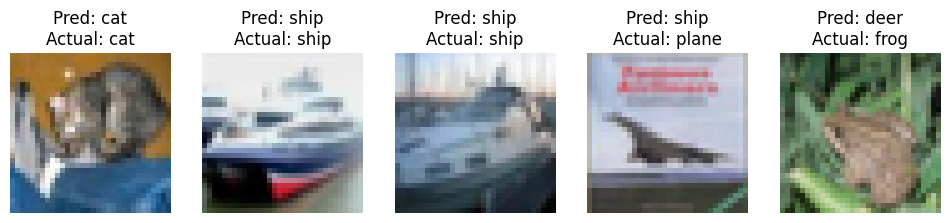

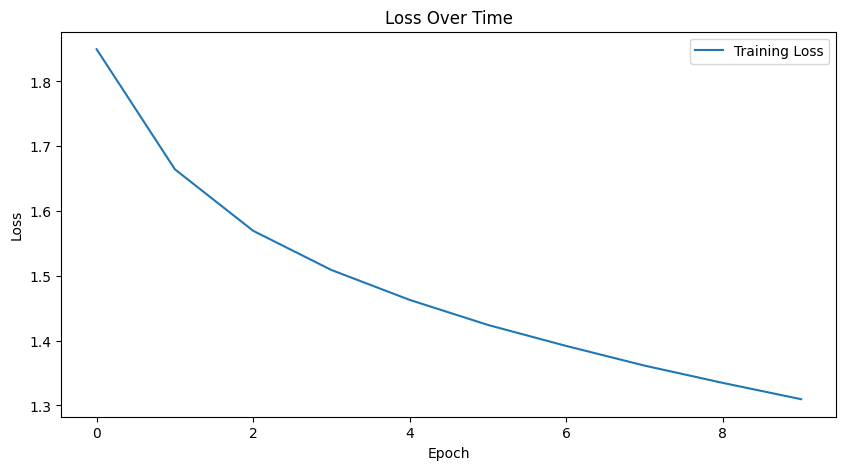

In [15]:
#pytorch works with tensor? so we need to import this
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# need to downlaod the training datasets
training_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=ToTensor(),
)

# need to download the test data!
test_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=ToTensor(),
)

# now we are defining batch size and stuff
batch_size = 64

# creating data loaders
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break

# now we are defining the NN via init + do forward funx
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

#now we are actually defining the mdoel
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(3*32*32, 512), #have to be like this because the dataset is in color!
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )

  def forward(self, X):
    x = self.flatten(X)
    logits = self.linear_relu_stack(x)
    return logits

model = NeuralNetwork().to(device)
print(model)

#now i'm getting the numbers to compare by definding loss + optimization and then the "history"
model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

challenger_train_loss = []
challenger_test_acc = []

#training the actual model now:
epochs = 10
print("Starting trainign...")
for epoch in range(epochs):
  avg_train_loss = training_loop(train_dataloader, model, loss_fn, optimizer, device)
  acc, avg_test_loss = testing_loop(test_dataloader, model, loss_fn, device)

  #saving the results
  challenger_train_loss.append(avg_train_loss)
  challenger_test_acc.append(acc)

  print(f"Epoch {epoch+1:2d} | loss: {avg_train_loss:.4f} | Acc: {acc:.2f}%")

print("finished!")

#now we are visualizing
import matplotlib.pyplot as plt

#batch of images from test set
images, labels = next(iter(test_dataloader))
images, labels = images.to(device), labels.to(device)

# predictions?
outputs = model(images)
_, preds = torch.max(outputs, 1)
# first 5 images
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 4))
for i in range(5):
  plt.subplot(1, 5, i+1)
  #undo earlier transpose for the image to not look funky
  img = images[i].cpu().permute(1, 2, 0).numpy()
  plt.imshow(img)
  plt.title(f"Pred: {classes[preds[i]]}\nActual: {classes[labels[i]]}")
  plt.axis('off')
plt.show()


#now we are plotting the training curve?
plt.figure(figsize=(10, 5))
plt.plot(challenger_train_loss, label='Training Loss')
plt.title('Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

now that i made both models, i have to comapre them to eachother via visualization

Using cuda device
training pytorch model
pytorch epoch 1: Acc 40.39%
pytorch epoch 2: Acc 44.61%
pytorch epoch 3: Acc 46.22%
pytorch epoch 4: Acc 47.42%
pytorch epoch 5: Acc 46.91%
pytorch epoch 6: Acc 47.55%
pytorch epoch 7: Acc 47.73%
pytorch epoch 8: Acc 48.83%
pytorch epoch 9: Acc 48.76%
pytorch epoch 10: Acc 48.95%

training numpy model
numpy epoch 1: Acc 27.65%
numpy epoch 2: Acc 54.28%
numpy epoch 3: Acc 58.66%
numpy epoch 4: Acc 60.84%
numpy epoch 5: Acc 66.02%
numpy epoch 6: Acc 58.75%
numpy epoch 7: Acc 67.27%
numpy epoch 8: Acc 65.16%
numpy epoch 9: Acc 59.26%
numpy epoch 10: Acc 59.45%


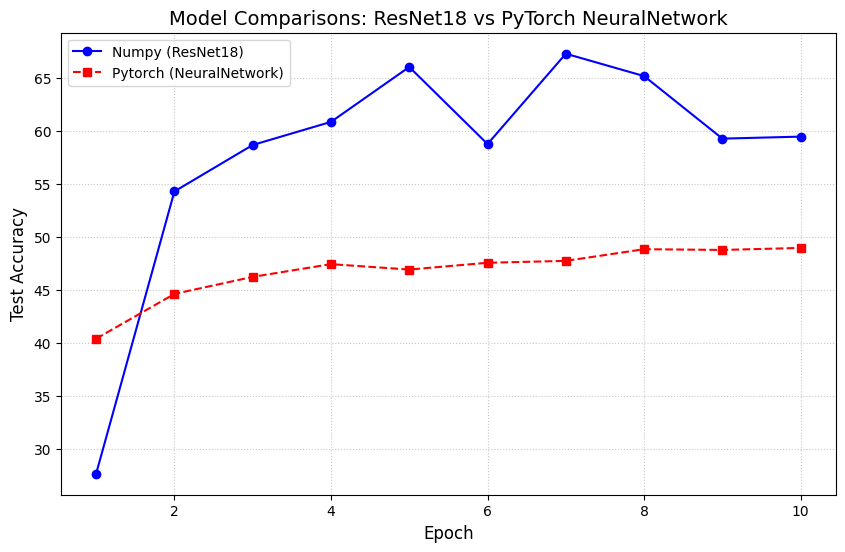

In [16]:
#need to store information for the plot:
numpy_accuracy_history = []
pytorch_accuracy_history = []

#need to call the training and testing loops for BOTH models and run them aganist eachother
epochs = 10 #control

# Re-define ResNet model and its optimizer for comparison
import torch.optim as optim
from torchvision import models
import torch.nn as nn
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

# ResNet model (originally defined as 'model' in WFwsENkDOc_k)
resnet_model = models.resnet18(pretrained=True)
num_features_resnet = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_features_resnet, 10)
resnet_model = resnet_model.to(device)
resnet_optimizer = optim.Adam(resnet_model.parameters(), lr=0.01) # Assuming same LR as original training

# --- Re-defining NeuralNetwork class and its instances for challenger_model ---
# (Copied from V_ENevNyxaYG to ensure availability if cell V_ENevNyxaYG was not run or its state was reset)
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(3*32*32, 512), #have to be like this because the dataset is in color!
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )

  def forward(self, X):
    x = self.flatten(X)
    logits = self.linear_relu_stack(x)
    return logits

# Instantiate challenger model and its optimizer
challenger_model = NeuralNetwork().to(device)
loss_fn = nn.CrossEntropyLoss() # Assuming loss_fn is the same as in V_ENevNyxaYG
challenger_optimizer = torch.optim.Adam(challenger_model.parameters(), lr=0.001) # Assuming same LR as in V_ENevNyxaYG

#pytorch
print("training pytorch model")
for epoch in range(epochs):
  training_loop(train_dataloader, challenger_model, loss_fn, challenger_optimizer, device)
  acc, _ = testing_loop(test_dataloader, challenger_model, loss_fn, device)
  pytorch_accuracy_history.append(acc)
  print(f"pytorch epoch {epoch+1}: Acc {acc:.2f}%")

#numpy (ResNet)
print("\ntraining numpy model")
for epoch in range(epochs):
  training_loop(train_dataloader, resnet_model, loss_fn, resnet_optimizer, device)
  acc, _ = testing_loop(test_loader, resnet_model, loss_fn, device)
  numpy_accuracy_history.append(acc)
  print(f"numpy epoch {epoch+1}: Acc {acc:.2f}%")


#creating visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

#plotting both lines
plt.plot(range(1, epochs+1), numpy_accuracy_history, 'b-o', label='Numpy (ResNet18)')
plt.plot(range(1, epochs+1), pytorch_accuracy_history, 'r--s', label='Pytorch (NeuralNetwork)')

#graph formating
plt.title('Model Comparisons: ResNet18 vs PyTorch NeuralNetwork', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)

#so that we can save the graph
plt.savefig('model_comparison_plot.png')
plt.show()

When searching methods of visualization I found CAM to make a heatmap of where it is "looking" to classify an image

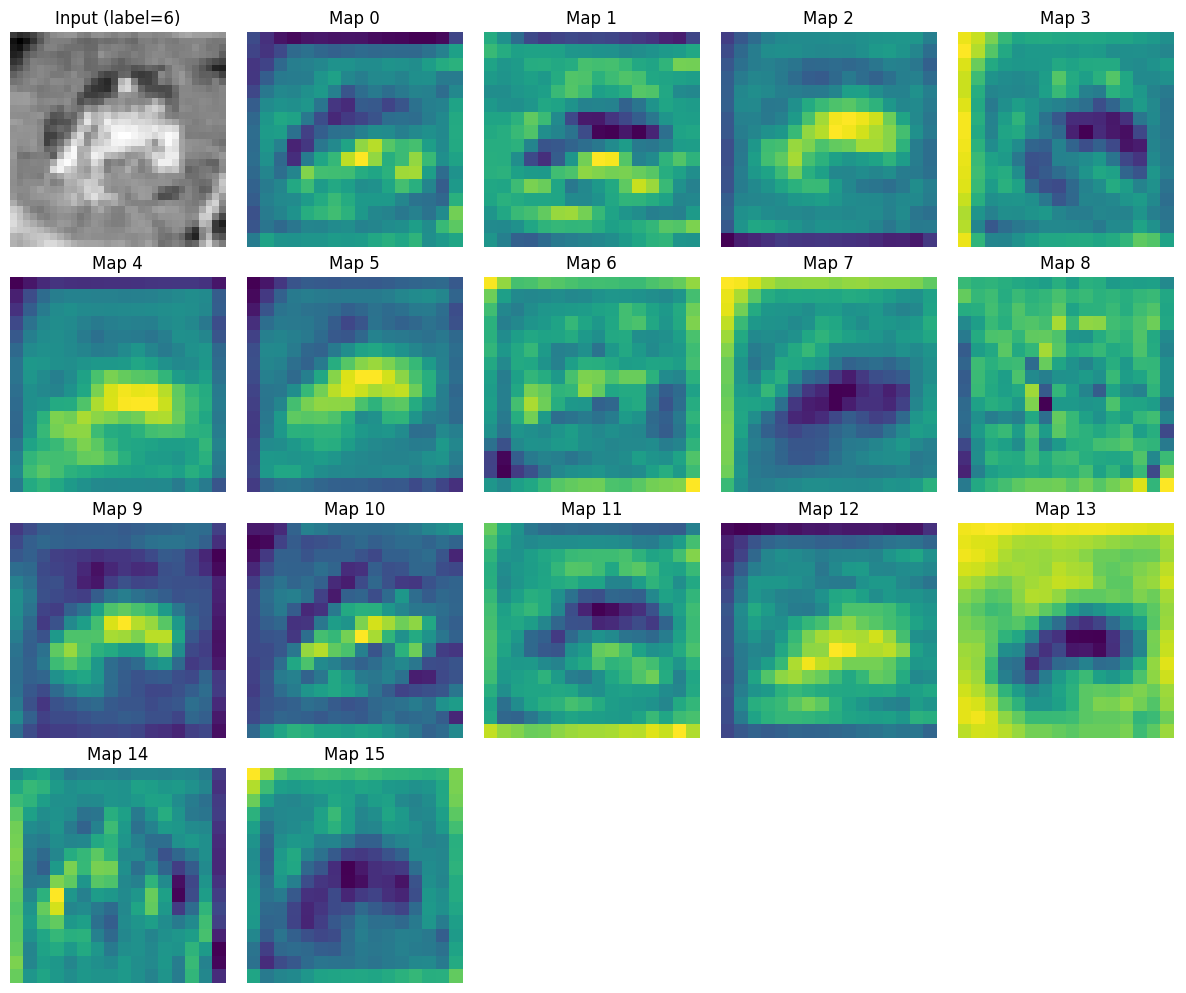

In [17]:
#how we are going to do this: take one image and run through both models, then plot the output to see the difference?
#this is the same as the CNN code from class

import matplotlib.pyplot as plt
import torch

#grabbing one batch
images, labels = next(iter(train_dataloader))
images = images.to(device)


#first convultion layer
first_conv = resnet_model.conv1

#running first convolution
with torch.no_grad():
  conv1_out = first_conv(images)
#now we are picking one image from said batch
idx = 0
input_img = images[idx, 0].detach().cpu()
fmaps = conv1_out[idx].detach().cpu()

fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.flatten()

axes [0].imshow(input_img, cmap="gray")
axes[0].set_title(f"Input (label={labels[idx].item()})")
axes[0].axis("off")

#feature maps?
for i in range(16):
  ax = axes[i+1]
  ax.imshow(fmaps[i], cmap="viridis")
  ax.set_title(f"Map {i}")
  ax.axis("off")

#hiding unused axes
for j in range(17, len(axes)):
  axes[j].axis("off")
plt.tight_layout()
plt.show()


In [2]:
#i want to make a visual for the pytorch to really be able to compare
first_layer = challenger_model.linear_relu_stack[0]

with torch.no_grad():
  x_flat = challenger_model.flatten(images)
  activations = first_layer(x_flat)

idx = 0
hidden_grid = activations[idx].cpu().view(16, 32)

#it's graph time!
plt.figure(figsize=(8, 4))
plt.imshow(hidden_grid, cmap='magma')
plt.colorbar()
plt.title("Pytorch Model: First Layer Activation")
plt.axis('off')
plt.show()

#looking what one neuron is looking for
weights = first_layer.weight[0].cpu().detach()
weight_img = weights.view(3, 32, 32).permute(1, 2, 0)
weight_img = (weight_img - weight_img.min()) / (weight_img.max() - weight_img.min())

plt.imshow(weight_img)
plt.title("What The Neuron Is Looking For")
plt.show()

NameError: name 'challenger_model' is not defined

In [2]:
!git clone https://github.com/layadevulapalli/neural_networks_from_scratch.git


Cloning into 'neural_networks_from_scratch'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 96 (delta 13), reused 13 (delta 13), pack-reused 80 (from 1)
Receiving objects: 100% (96/96), 51.90 MiB | 36.18 MiB/s, done.
Resolving deltas: 100% (35/35), done.
